In [ ]:
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
start = '2016-01-01'
end = '2021-04-01'

In [ ]:
stonk = web.get_data_yahoo('AOT.BK', start=start, end=end)

In [ ]:
stonk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1281 entries, 2016-01-04 to 2021-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1281 non-null   float64
 1   Low        1281 non-null   float64
 2   Open       1281 non-null   float64
 3   Close      1281 non-null   float64
 4   Volume     1281 non-null   float64
 5   Adj Close  1281 non-null   float64
dtypes: float64(6)
memory usage: 70.1 KB


In [ ]:
stonk 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,35.099998,33.900002,34.900002,34.299999,30288000.0,32.061298
2016-01-05,34.500000,33.900002,34.400002,34.000000,31804000.0,31.780874
2016-01-06,34.299999,33.799999,34.000000,34.000000,27878000.0,31.780874
2016-01-07,33.799999,33.299999,33.799999,33.700001,30974000.0,31.500456
2016-01-08,34.099998,33.599998,33.900002,33.799999,27068000.0,31.593922
...,...,...,...,...,...,...
2021-03-29,68.750000,68.000000,68.000000,68.250000,12389700.0,68.250000
2021-03-30,69.500000,68.250000,68.500000,69.000000,19710400.0,69.000000
2021-03-31,69.500000,68.750000,69.250000,69.000000,14512000.0,69.000000


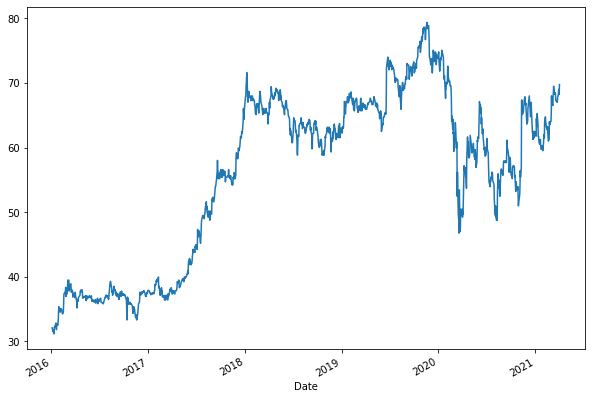

In [ ]:
stonk['Adj Close'].plot(figsize=(10,7))

In [ ]:
!pip install mpl-finance

In [ ]:
import mplfinance as mpf
ohlc = stonk.loc[:,['Open','High','Low','Close']]
ohlc

,Open,High,Low,Close
Date,,,,
2016-01-04,34.900002,35.099998,33.900002,34.299999
2016-01-05,34.400002,34.500000,33.900002,34.000000
2016-01-06,34.000000,34.299999,33.799999,34.000000
2016-01-07,33.799999,33.799999,33.299999,33.700001
2016-01-08,33.900002,34.099998,33.599998,33.799999
...,...,...,...,...
2021-03-29,68.000000,68.750000,68.000000,68.250000
2021-03-30,68.500000,69.500000,68.250000,69.000000
2021-03-31,69.250000,69.500000,68.750000,69.000000


/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


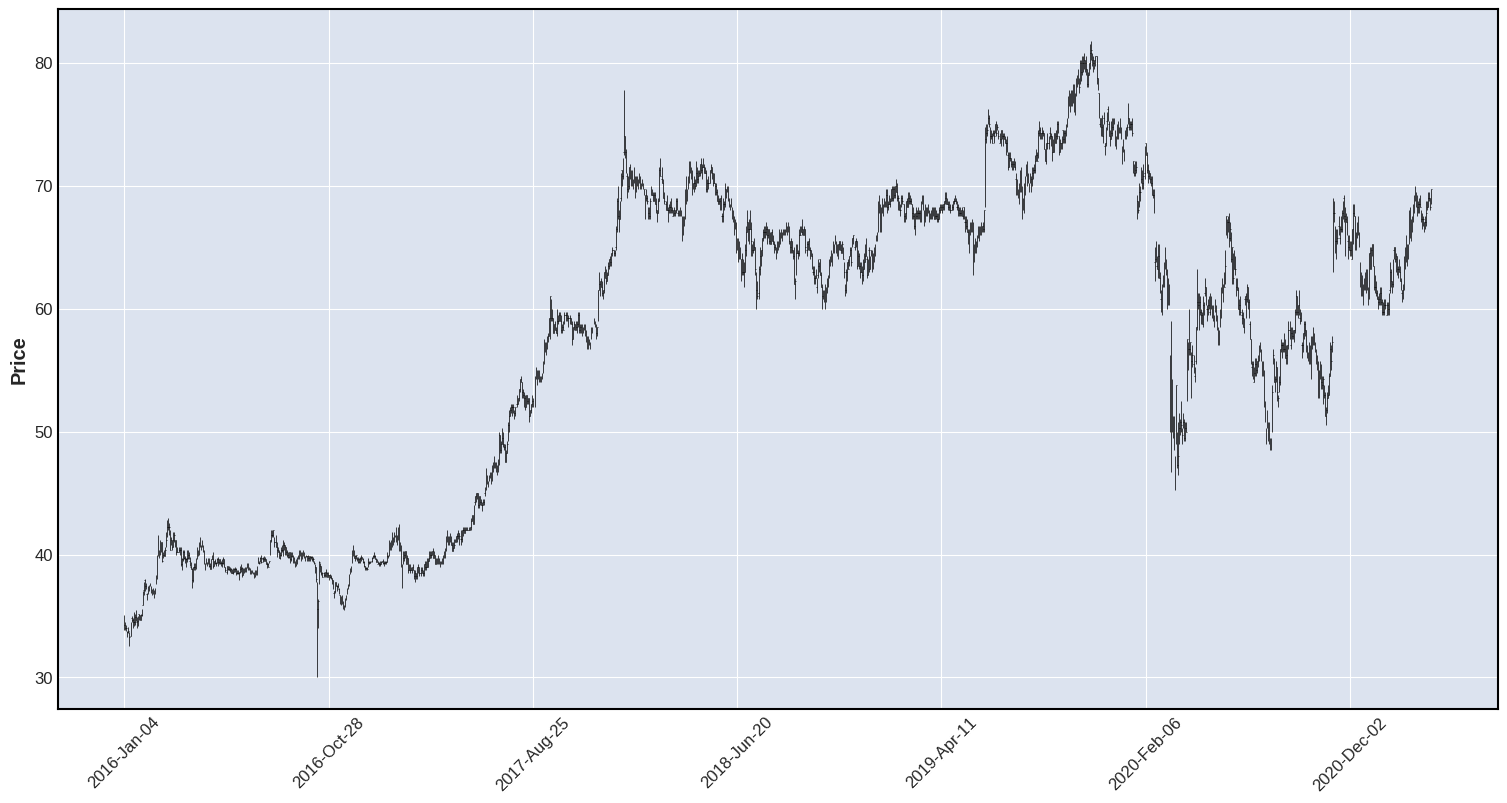

In [ ]:
mpf.plot(ohlc,figsize=(20,10))

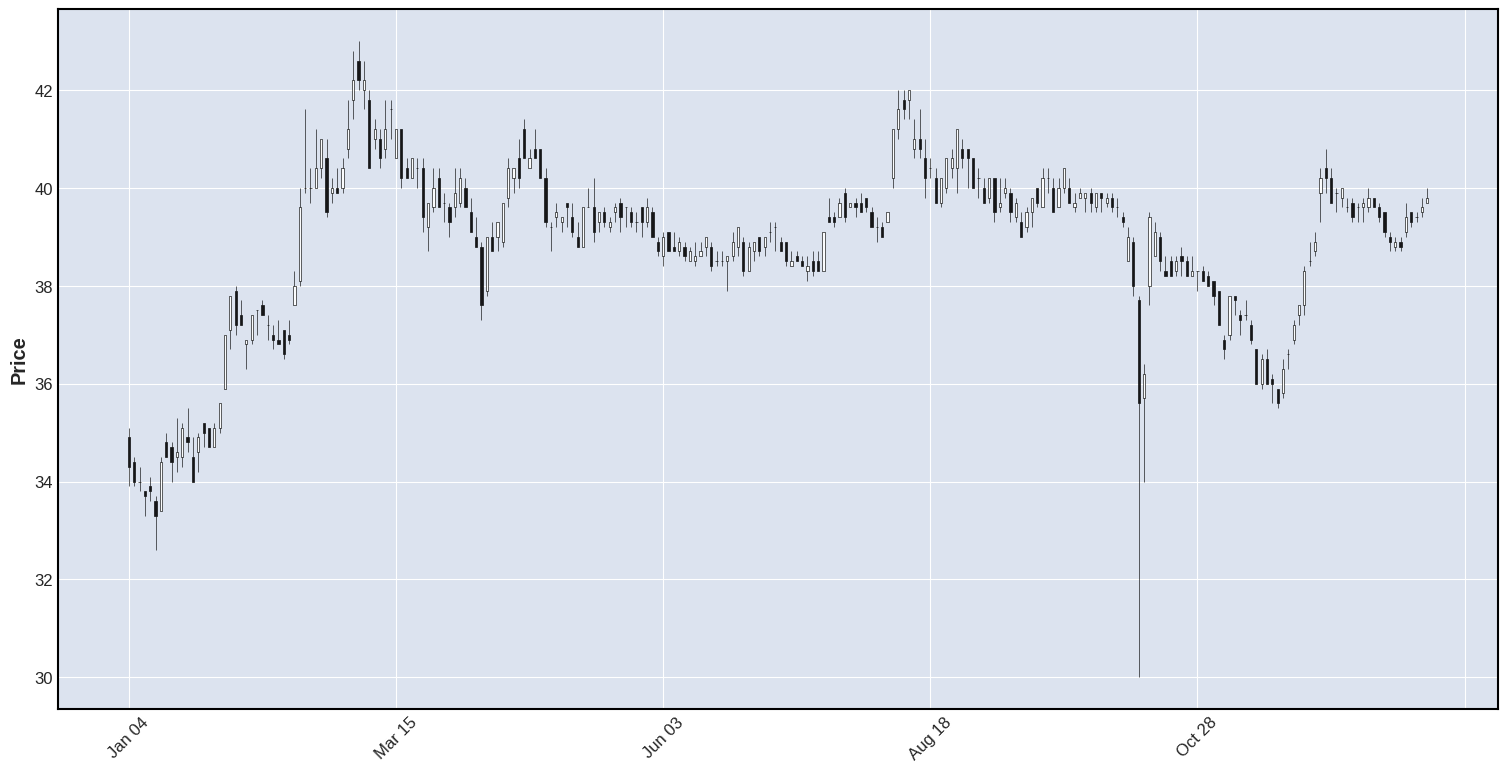

In [ ]:
mpf.plot(ohlc.loc['2016'],type='candle',figsize=(20,10))

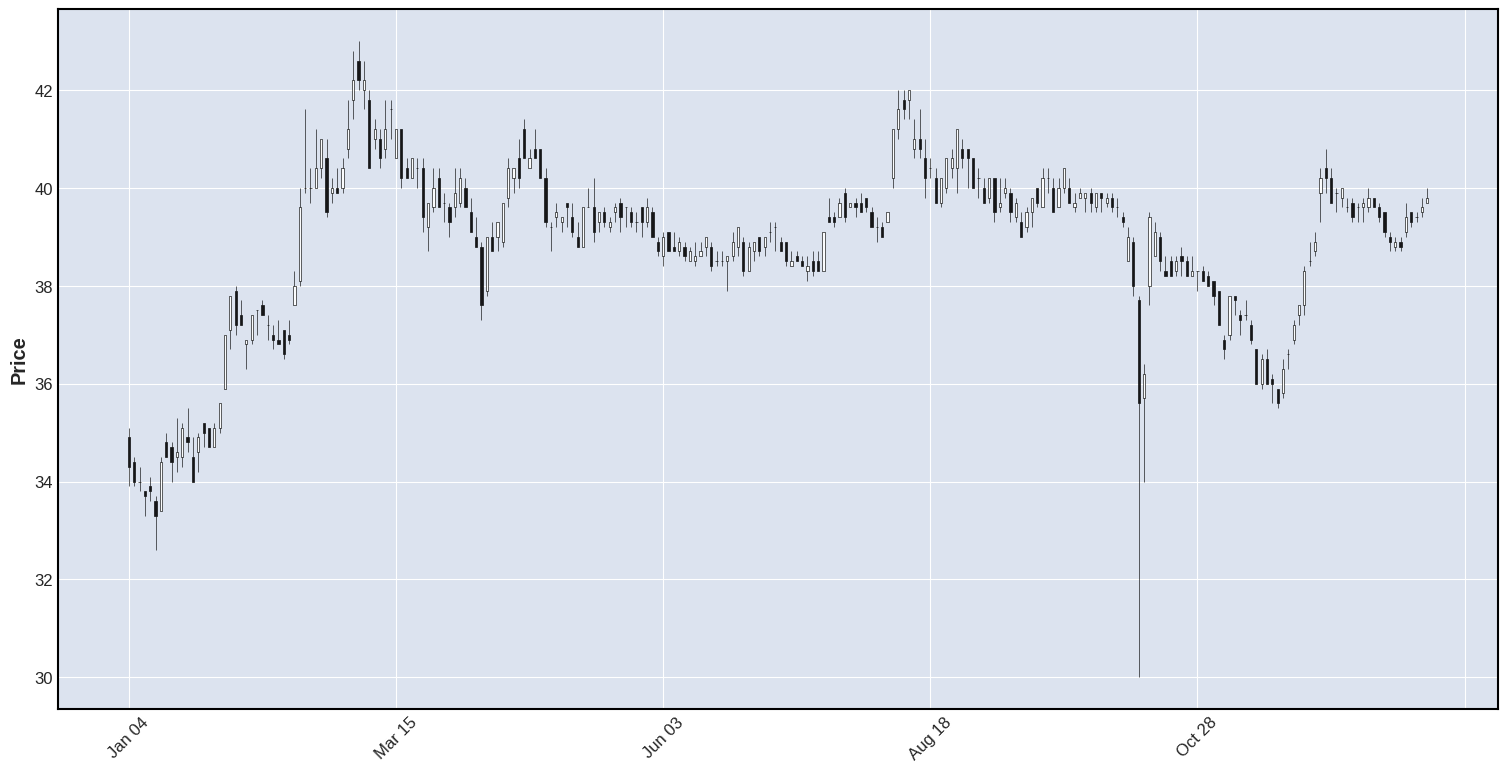

In [ ]:
ohlc = stonk.loc[:,['Open','High','Low','Close','Volume']]
mpf.plot(ohlc.loc['2016'],type='candle',figsize=(20,10))

In [ ]:
kwargs = dict(type='candle',volume=True,figsize=(20,10))

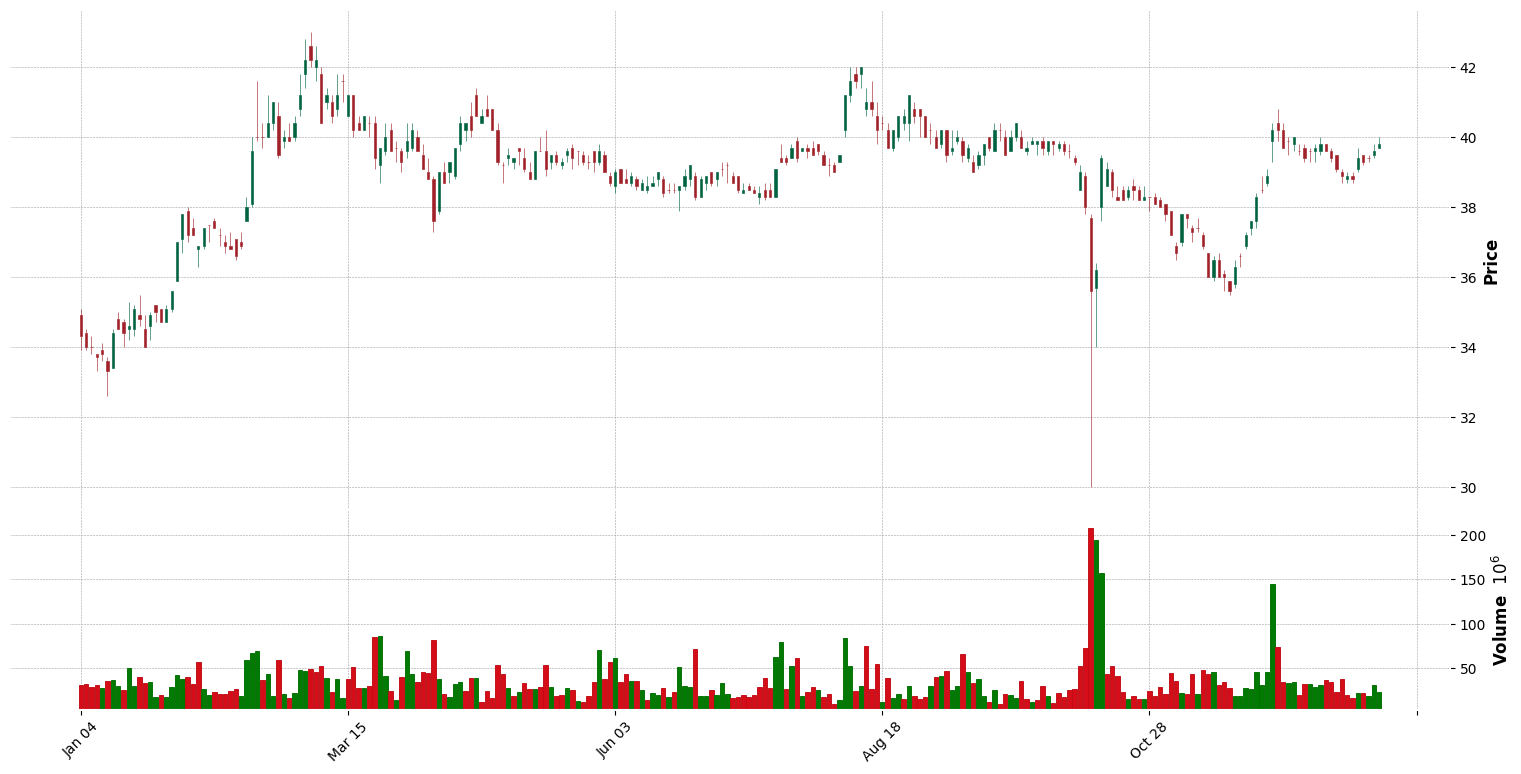

In [ ]:
mpf.plot(ohlc.loc['2016'],**kwargs,style='charles')

รายละเอียดเพิ่มเติม 
https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb

คราวนี้มาหา Return ต่อ เดี๋ยวต้องเอาไปใช้ต่อ

In [ ]:
ret = stonk['Adj Close']/stonk['Adj Close'].shift(1) - 1
#ตรงนี้จะใช้ .pct_change() ก็ได้นะ

คราวนี้ก็จะอยู่ที่ data ว่ามา clean แค่ไหน ติดเสาร์อาทิตย์ และวันหยุดตลาดหลักทรัพย์หรือไม่ ถ้ามีติดก็ ต้องดูในรายละเอียด ว่าติดเป็น 0 หรือ NaN, Null หรือราคาค้างเติ่ง

In [ ]:
ret.head(20) #วันแรกจะต้องเป็น NaN เพราะไม่มีตัวหาร

Date
2016-01-04         NaN
2016-01-05   -0.008746
2016-01-06    0.000000
2016-01-07   -0.008823
2016-01-08    0.002967
2016-01-11   -0.014793
2016-01-12    0.033033
2016-01-13    0.002907
2016-01-14   -0.002899
2016-01-15    0.005814
2016-01-18    0.014451
2016-01-19   -0.008547
2016-01-20   -0.022988
2016-01-21    0.026471
2016-01-22    0.002865
2016-01-25   -0.008571
2016-01-26    0.011527
2016-01-27    0.014245
2016-01-28    0.039326
2016-01-29    0.021622
Name: Adj Close, dtype: float64

(array([  1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   4.,   7.,  11.,  13.,  43.,  42., 142., 229., 251., 226.,
        142.,  71.,  42.,  21.,  10.,   7.,   3.,   2.,   2.,   1.,   0.,
          1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.12809917, -0.12186907, -0.11563896, -0.10940886, -0.10317876,
        -0.09694866, -0.09071855, -0.08448845, -0.07825835, -0.07202825,
        -0.06579814, -0.05956804, -0.05333794, -0.04710784, -0.04087774,
        -0.03464763, -0.02841753, -0.02218743, -0.01595733, -0.00972722,
        -0.00349712,  0.00273298,  0.00896308,  0.01519319,  0.02142329,
         0.02765339,  0.03388349,  0.04011359,  0.0463437 ,  0.0525738 ,
         0.0588039 ,  0.065034  ,  0.07126411,  0.07749421,  0.08372431,
         0.08995441,  0.09618452,  0.10241462,  0.10864472,  0.11487482,
         0.12110492,  0.12733503,  0.13356513,  0.13979523,  0.14602533,
 

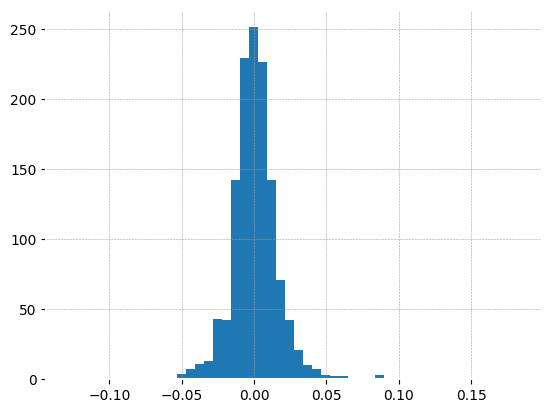

In [ ]:
plt.hist(ret, bins=50)

Text(0.5, 1.0, 'Boxplot of US Oil Price ')

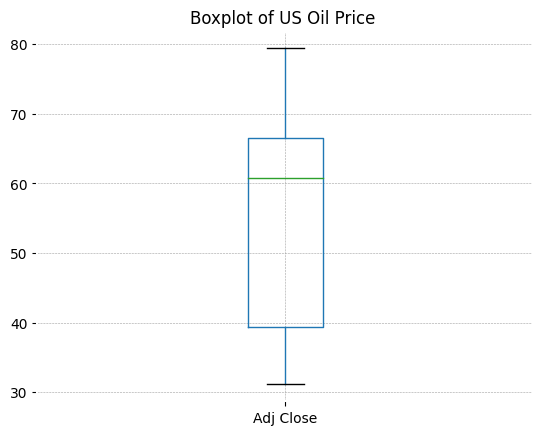

In [ ]:
stonk.boxplot(column = 'Adj Close')
plt.title('Boxplot of US Oil Price ')